In [34]:
import numpy as np
import pandas as pd
from pandas.plotting import table 
import matplotlib.pyplot as plt
# Set ipython's max row display
pd.set_option('display.max_row', 5001)
# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [35]:
#load file
data_file = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [36]:
#Specifying Column data
order_id=data_file['order_id']
shop_id=data_file['shop_id']
order_amount=data_file['order_amount']
total_items= data_file['total_items']

In [37]:
#Total revenue from all shops
Revenue=int(order_amount.sum())
print('Total revenue is: $',f"{Revenue:,d}")

Total revenue is: $ 15,725,640


In [38]:
#Total items sold
Total_items_sold=int(np.sum(total_items))
print('Total items sold are',f"{Total_items_sold:,d}")

Total items sold are 43,936


In [39]:
# Total amount of transaction
Total_transactions=int( np.amax(order_id))
print('Total transactions are:',f"{Total_transactions:,}")

Total transactions are: 5,000


In [40]:
#How Original AOV was calculated
Original_AOV=Revenue/Total_transactions
Original_AOV = round(Original_AOV, 2)
print('The original AOV is:$',f"{Original_AOV:,}")


The original AOV is:$ 3,145.13


In [41]:
#Looking for any notable outliers of large purchases
data_file.sort_values(by=['total_items']).tail(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29.343
4847,4848,13,993,960,6,cash,2017-03-27 11:00:45.292
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:17.910
4868,4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00.000
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00.000
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00.000
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00.000


In [42]:
#seeing how many orders the shop made
pd.value_counts(data_file['shop_id']==42)

False    4949
True       51
Name: shop_id, dtype: int64

In [43]:
#seeing how many times the large purchases were made
pd.value_counts(data_file['total_items']==2000)

False    4983
True       17
Name: total_items, dtype: int64

In [44]:
#seeing how many times user made purchases, note its equal to the large purchases so thats the only purchases they made
pd.value_counts(data_file['user_id']==607)

False    4983
True       17
Name: user_id, dtype: int64

In [45]:
#Looking at the average unit price for shoes
Total_units_sold=data_file.sum()[4]
Average_unit_price= Revenue/Total_units_sold
Average_unit_price = round(Average_unit_price, 2)
print('The average unit price is:$',Average_unit_price)


The average unit price is:$ 357.92


<AxesSubplot:xlabel='order_id', ylabel='AUPPS'>

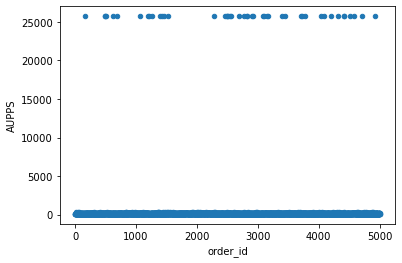

In [46]:
#Average unit price per store scatter plote
data_file['AUPPS']=data_file['order_amount']/data_file['total_items']
data_file.plot.scatter('order_id','AUPPS')


In [47]:
#Finding information about the expensive shop outlier
Expensive_sneaker_shop=int(data_file.loc[data_file['AUPPS'] > 25000]['shop_id'].unique())
sneaker_cost= int(data_file.loc[data_file['AUPPS'] > 25000]['AUPPS'].unique())
Amount_sold= int(data_file.loc[data_file['AUPPS'] > 25000]['total_items'].sum())

In [48]:
print('The expensive shop is:', Expensive_sneaker_shop)
print('and it sells the sneakers for: $',f"{sneaker_cost:,}")
print('Quantity sold',Amount_sold,'sneakers')

The expensive shop is: 78
and it sells the sneakers for: $ 25,725
Quantity sold 88 sneakers


In [49]:
#Average amount of items sold per shop
Average_items_sold= int(Total_items_sold/ 100)
print('The average amount of items sold per shop is',Average_items_sold)



The average amount of items sold per shop is 439


In [50]:
#Seeing the new AOV with not large purchases
bulk_purchase_amount=data_file.loc[data_file['user_id']==607].sum()[3]
New_Revenue= Revenue-bulk_purchase_amount
Tansactions_LP=((data_file.loc[data_file['user_id']==607].sum()[2])/607) #large purchase transactions
New_transactions= Total_transactions-Tansactions_LP
AOV_no_bulk_purchase= New_Revenue/ New_transactions
AOV_no_bulk_purchase = round(AOV_no_bulk_purchase, 2)
print('The AOV with the notable large purchases removed is:$',AOV_no_bulk_purchase)


The AOV with the notable large purchases removed is:$ 754.09


In [51]:
#Seeing new AOV without expensive shoes
TRES= (sneaker_cost * Amount_sold) #Total revenue from expensive sneaker
Revenue_nes= (Revenue-TRES)
TRES_transactions=int(data_file.loc[data_file['shop_id']==78].sum()[1])/(78)
AOV_nes= Revenue_nes/ (Total_transactions-TRES_transactions)  #AOC with no expensive shoe
AOV_nes = round(AOV_nes, 2)
print('The AOV with the notable expensive shoe sales removed is:$',f"{AOV_nes:,}")


The AOV with the notable expensive shoe sales removed is:$ 2,717.37


In [52]:
#AOV with both outliers removed
Revenue_NO= Revenue-bulk_purchase_amount-TRES #Revenue with bulk and expensive outliers removed
Transactions_NO=Total_transactions-Tansactions_LP-TRES_transactions #transactions with bulk and expensive outliers removed
AOV_NO = Revenue_NO/Transactions_NO
AOV_NO = round(AOV_NO, 2)
print('The AOV with both natable outliers removed is:$',f"{AOV_NO:,}")

The AOV with both natable outliers removed is:$ 302.58


In [89]:
store_ID= [None]*100
aot= [None]*100
rps=[None]*100
RPV_per_store=[None]*100
i=0
for i in range (0,100):
    aot[i]=((data_file.loc[data_file['shop_id']==i+1]['shop_id']).sum())/(i+1)
    i=i+1
for i in range (0,100):
    store_ID[i]=((data_file.loc[data_file['shop_id']==i+1]['shop_id'].sum()))/(aot[i])
    i=i+1
for i in range (0,100):
    rps[i]=(data_file.loc[data_file['shop_id']==i+1]['order_amount']).sum()
    i=i+1
AOV_per_store= [x/j for x,j in zip(rps, aot)]
for i in range (0,100):
    RPV_per_store[i] = (rps[i])/(len((data_file.loc[data_file['shop_id']==i+1]['user_id'].unique())))
    i=i+1
AOV_per_store = [round(num, 2) for num in AOV_per_store]
RPV_per_store = [round(num, 2) for num in RPV_per_store]

data= {'Store ID': store_ID,
       'Amount of Transactions': aot,
       'Revenue per store $':rps,
       'Average order value per store $':AOV_per_store, 
       'Revenue per visitor $':RPV_per_store}

df=pd.DataFrame(data, columns= ['Store ID',
                                'Amount of Transactions', 
                                'Revenue per store $',
                                'Average order value per store $',
                                'Revenue per visitor $'])

print(df)

    Store ID  Amount of Transactions  Revenue per store $  \
0        1.0                    44.0                13588   
1        2.0                    55.0                 9588   
2        3.0                    48.0                14652   
3        4.0                    51.0                13184   
4        5.0                    45.0                13064   
5        6.0                    59.0                22627   
6        7.0                    56.0                12208   
7        8.0                    46.0                11088   
8        9.0                    59.0                13806   
9       10.0                    53.0                17612   
10      11.0                    49.0                17480   
11      12.0                    53.0                18693   
12      13.0                    63.0                21760   
13      14.0                    58.0                14036   
14      15.0                    52.0                16065   
15      16.0            

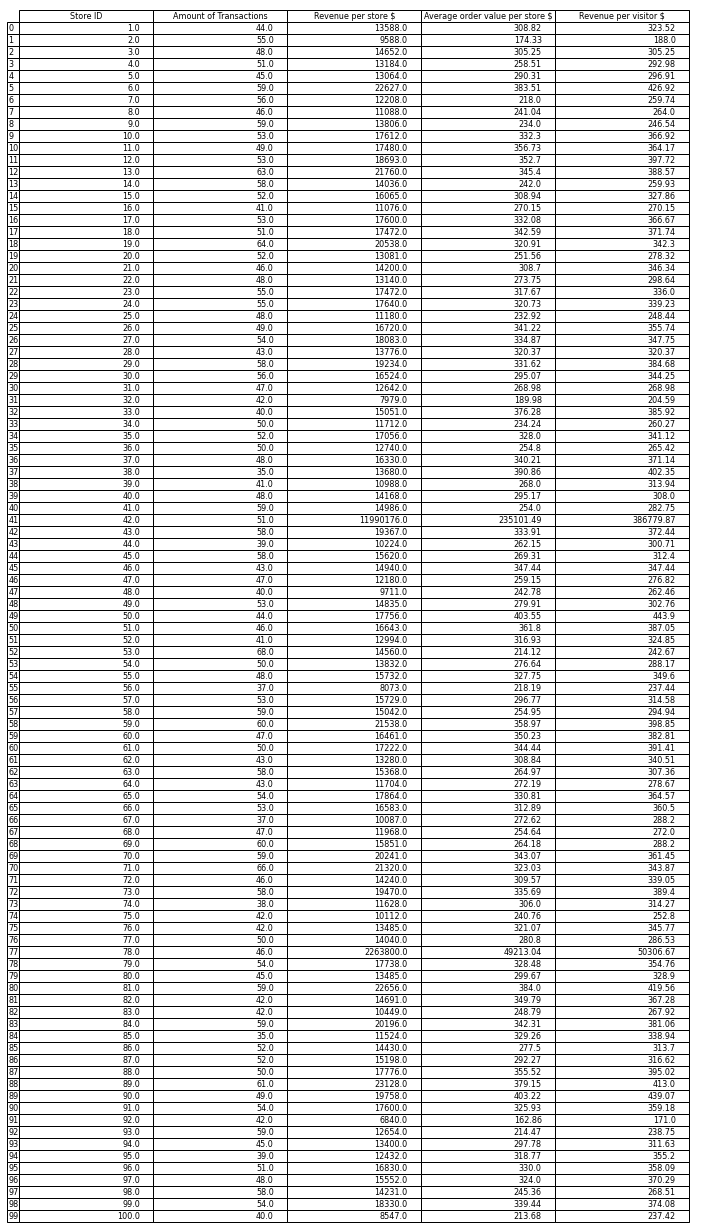

In [90]:
fig, ax = plt.subplots(figsize=(12, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, df, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(8) 
# save the result
plt.savefig('table.png')